In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.size'] = '12'

In [61]:
home_dir = '/content/drive/MyDrive/Colab Notebooks/transient_detection/'

In [62]:
import tensorflow as tf

In [63]:
model = tf.keras.models.load_model(home_dir+'model/sequence_model_0_mask.h5')

In [64]:
from sklearn.preprocessing import minmax_scale
from scipy.signal import detrend

In [65]:
def preprocess(t_raw, d_raw):

  index_valid = ~np.isnan(d_raw)

  t = t_raw[index_valid]
  d = minmax_scale(detrend(d_raw[index_valid]))

  return t, d

In [66]:
def predict(d):
  prob = np.squeeze(model.predict(d[np.newaxis,:,np.newaxis]))
  return prob

# AC03

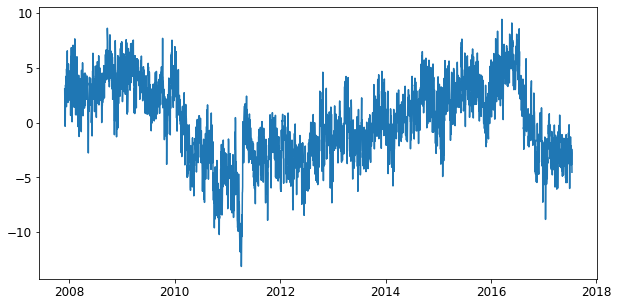

In [ ]:
def read_timeseries(file_path):
  file_path = home_dir + 'raw_data/' + sta_name + 'FilterResid.neu'

  df = pd.read_table(file_path,sep='\s+',float_precision='round_trip',comment='#',names=['DecYr','Yr','DoY','N','E','U','Nsig','Esig','Usig'])
  t = df['DecYr'].to_numpy()
  d = np.zeros((3,t.size))
  d[0,:] = df['E'].to_numpy()
  d[1,:] = df['N'].to_numpy()
  d[2,:] = df['U'].to_numpy()

  return t, d

sta_name = 'ac03'
t_raw, d_raw = read_timeseries(sta_name)

plt.figure(figsize=(10,5))
plt.plot(t_raw, d_raw[1,:], '-')
plt.show()

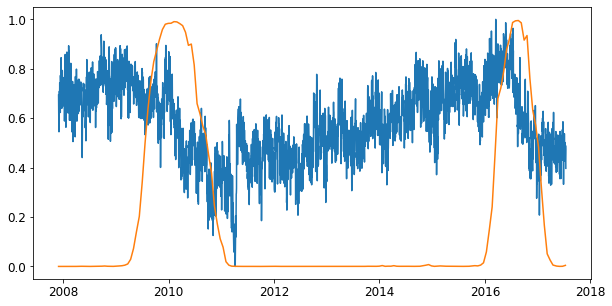

In [ ]:
t, d = preprocess(t_raw, d_raw[1,:])

increment = 20
prob = predict(d[::increment])

plt.figure(figsize=(10,5))
plt.plot(t, d, '-')
plt.plot(t[::increment], prob, '-')
plt.show()

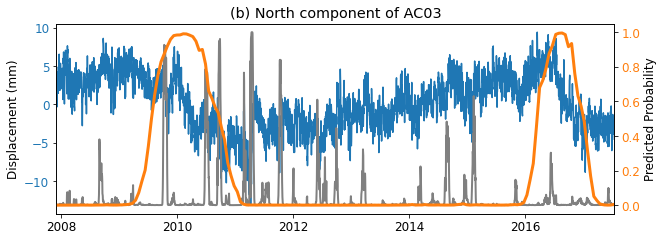

In [ ]:
fig = plt.figure(figsize=(10,3.5))
ax1 = fig.subplots()

color = 'tab:blue'
ax1.plot(t_raw, d_raw[1,:], '-', color=color)
ax1.set_xlim(t_raw[0], t_raw[-1])
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Displacement (mm)')

color = 'tab:orange'
ax2 = ax1.twinx()

prob = predict(d)
ax2.plot(t, prob, '-', color='gray', linewidth=2)

prob = predict(d[::20])
ax2.plot(t[::20], prob, '-', color=color, linewidth=3)

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Predicted Probability')
plt.title('(b) North component of AC03')
#plt.show()
plt.savefig('ac03.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)

# ATW2

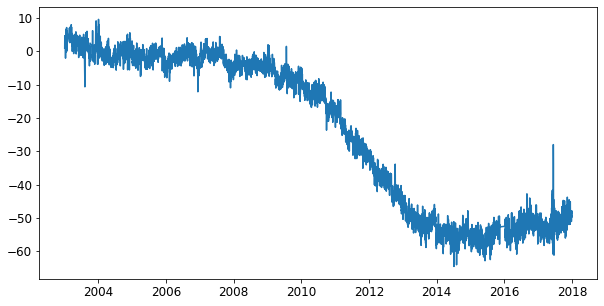

In [67]:
def read_timeseries2(file_path):
  df = pd.read_table(file_path,sep='\s+',float_precision='round_trip',comment='#',names=['DecYr','N','E','U','Nsig','Esig','Usig'])
  t = df['DecYr'].to_numpy()
  d = np.zeros((3,t.size))
  d[0,:] = df['E'].to_numpy()
  d[1,:] = df['N'].to_numpy()
  d[2,:] = df['U'].to_numpy()

  return t, d

file_path = home_dir + 'alaska/ATW2_detrend_ts.txt'
t_raw, d_raw = read_timeseries2(file_path)

plt.figure(figsize=(10,5))
plt.plot(t_raw, d_raw[1,:], '-')
plt.show()

In [68]:
t, d = preprocess(t_raw, d_raw[1,:])

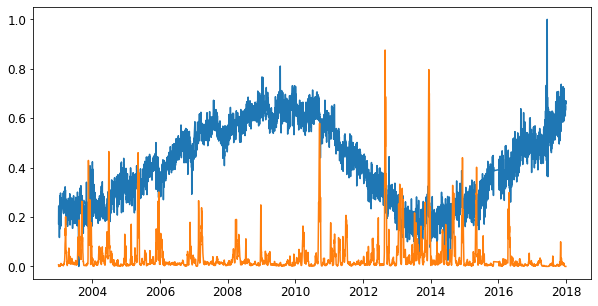

In [91]:
increment = 1
prob = predict(d[::increment])

plt.figure(figsize=(10,5))
plt.plot(t, d, '-')
plt.plot(t[::increment], prob, '-')
plt.show()

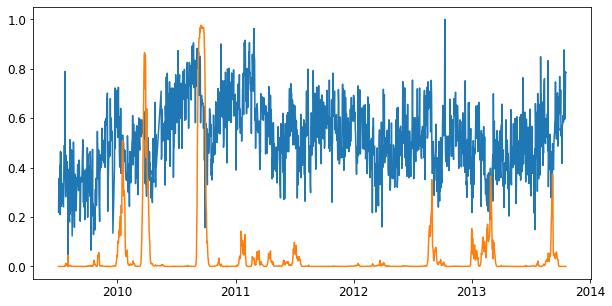

In [90]:
index = np.logical_and(t > 2009.5, t < 2013.8)
t_window, d_window = preprocess(t_raw[index], d_raw[1,index])

increment = 1
prob_window = predict(d_window[::increment])
plt.figure(figsize=(10,5))
plt.plot(t_window, d_window, '-')
plt.plot(t_window[::increment], prob_window, '-')
plt.show()

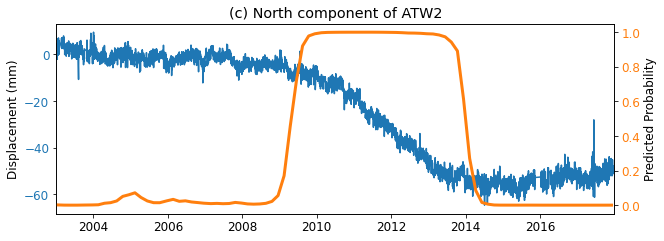

In [ ]:
fig = plt.figure(figsize=(10,3.5))
ax1 = fig.subplots()

color = 'tab:blue'
ax1.plot(t_raw, d_raw[1,:], '-', color=color)
ax1.set_xlim(t_raw[0], t_raw[-1])
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Displacement (mm)')

color = 'tab:orange'
ax2 = ax1.twinx()

prob = predict(d[::increment])
ax2.plot(t[::increment], prob, '-', color=color, linewidth=3)

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Predicted Probability')
plt.title('(c) North component of ATW2')
#plt.show()
plt.savefig('atw2.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)

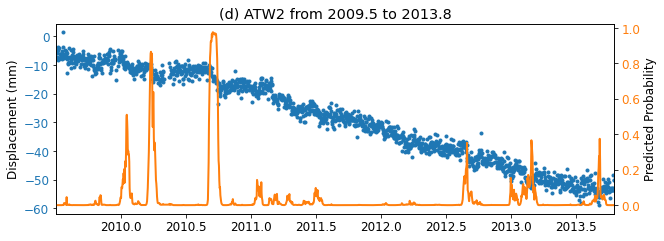

In [99]:
index = np.nonzero(np.logical_and(t > 2009.5, t < 2013.8))[0]
t_window, d_window = preprocess(t_raw[index], d_raw[1,index])

fig = plt.figure(figsize=(10,3.5))
ax1 = fig.subplots()

color = 'tab:blue'
ax1.plot(t_raw[index], d_raw[1,index], '.', color=color)
ax1.set_xlim(t_raw[index[0]], t_raw[index[-1]])
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Displacement (mm)')

color = 'tab:orange'
ax2 = ax1.twinx()

t_window, d_window = preprocess(t_raw[index], d_raw[1,index])
prob_window = predict(d_window[::increment])

ax2.plot(t_window[::increment], prob_window, '-', color=color, linewidth=2)

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Predicted Probability')
plt.title('(d) ATW2 from 2009.5 to 2013.8')
#plt.show()
plt.savefig('atw2_inset.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)